In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sigmoid function
def sigmoid(x):
    
    sig = 1 / (1 + np.exp(-x))
    
    return(sig)

# Feed forward
def feed_forward(x, network):
    
    n_layers = network[4]+1 #number of hidden layers plus the output layer
    outputD = {}
    """
    print("============================FEEDFORWARD============================")
    print("=====================input {}=====================".format(x))
    print("Weights {}".format(network[0]))
    print("Bias {}".format(network[1]))
    print("Output {}".format(outputD))
    """
    for i in range(n_layers):
      
      if i==0: #if its the first layer
        #print('Capa {}'.format(i))
        dotproduct = np.matmul(x,network[0]['W_hl'+str(i)].transpose()) + network[1]['b_hl'+str(i)] #does dot product
        output = sigmoid(dotproduct) #
        #print(output)
        #print(output.shape)
        #print(output.transpose().shape)
        outputD['output_hl'+str(i)]=output #stores the output of each layer hidden layer
      elif i==n_layers-1: #if it is the last layer
        #print('Capa {}'.format(i))
        dotproduct = np.matmul(outputD['output_hl'+str(i-1)],network[0]['W_out'].transpose()) + network[1]['b_out'] #does dot product
        output = sigmoid(dotproduct) #
        #print(output)
        #print(output.shape)
        #print(output.transpose().shape)
        outputD['output_out']=output #stores the output of output layer
      else: #if its any other hidden layer
        #print('Capa {}'.format(i))
        dotproduct = np.matmul(outputD['output_hl'+str(i-1)],network[0]['W_hl'+str(i)].transpose()) + network[1]['b_hl'+str(i)] #does dot product
        output = sigmoid(dotproduct) #
        #print(output)
        #print(output.shape)
        #print(output.transpose().shape)
        outputD['output_hl'+str(i)]=output #stores the output of each layer hidden layer                       
      
      #print("Output {}".format(outputD))
    #print("============================FEEDFORWARD============================")
    
    return outputD

# Network error
def net_error(tar, out):
    
    #print("tar:{} out:{}".format(tar,out))
    err = 0.5 * np.power(tar - out, 2)
    
    return(err)

def outputLayer_Error(tar,network):
  
    #print("tar:{} net:{}".format(tar,network[2]['output_out']))
    #return -(tar - network[2]['output_out']) * network[2]['output_out'] * (1 - network[2]['output_out'])
    derivate = network[2]['output_out'] * (1-network[2]['output_out'])
    #print(derivate)
    diff = -(tar - network[2]['output_out'])
    #print(diff)
    return np.multiply(diff,derivate)
    
  
# Back-propagation
def BP(x, tar, network):
  
  
    """
    network[0]: weights
    network[1]: biases
    network[2]: outputs
    network[3]: error layer
    network[4]: n_hidden_layers


    """
    n_layers = network[4]+1 #number of hidden layers plus the output layer

    #Calculating errors of each layer
    for i in reversed(range(n_layers)):
      if i==n_layers-1: #if its the output layer
        # Output layer error (L)
        L_error = outputLayer_Error(tar,network)
        network[3]['e_output'] = L_error
      elif i==n_layers-2: #if its the last hidden layer before output layer
        if network[3]['e_output'].size!=1: #if its not only one neuron
          dotproduct = np.matmul(network[3]['e_output'],network[0]['W_out']) 
          l_error = dotproduct * network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)])
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer  
        else:
          l_error = (network[3]['e_output'] * network[0]['W_out']) * (network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)]))
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer  
      else:#if its any othe hidden layer
        if network[3]['e_hl'+str(i+1)].size!=1:
          dotproduct = np.matmul(network[3]['e_hl'+str(i+1)],network[0]['W_hl'+str(i+1)]) 
          l_error = dotproduct * (network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)]))
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer
        else:
          l_error = (network[3]['e_hl'+str(i+1)] * network[0]['W_hl'+str(i+1)]) * (network[2]['output_hl'+str(i)] * (1 - network[2]['output_hl'+str(i)]))
          network[3]['e_hl'+str(i)] = l_error #stores the error of the i-hidden-layer
              
    #print("Error {}".format(network[3]))
          
    #Calculating new weights and bias
    n_Weights = {}
    n_Bias = {}
    
    #print(network)
    for i in reversed(range(n_layers)):
      if i==n_layers-1: #if its the output layer
        """
        print("Error layer {}".format(i))
        print("Error {}".format(network[3]['e_output']))
        print("previous output {}".format(network[2]['output_hl'+str(i-1)]))
        #n_W_out = network[0]['W_out'] - alpha * network[3]['e_output'] * network[2]['output_hl'+str(i-1)]
        #e_reshape = np.reshape(network[3]['e_output'],(network[3]['e_output'].size,1))
        #n_W_out = np.subtract(network[0]['W_out'] , (alpha * np.multiply(e_reshape , network[2]['output_hl'+str(i-1)])))
        """
        if network[3]['e_output'].size == 1: #if its only one gate to solve
            n_W_out = np.subtract(network[0]['W_out'] , (alpha * np.multiply(network[3]['e_output'] , network[2]['output_hl'+str(i-1)])))
            n_Weights['W_out'] = n_W_out
            n_b_out = network[1]['b_out'] - alpha * network[3]['e_output'] #calculates the new bias for the output layer
            n_Bias['b_out'] = n_b_out
        else:
            e_reshape = np.reshape(network[3]['e_output'],(network[3]['e_output'].size,1))
            n_W_out = np.subtract(network[0]['W_out'] , (alpha * np.multiply(e_reshape , network[2]['output_hl'+str(i-1)])))
            n_Weights['W_out'] = n_W_out
            n_b_out = network[1]['b_out'] - alpha * network[3]['e_output'] #calculates the new bias for the output layer
            n_Bias['b_out'] = n_b_out
                
      elif i!=0:#any other hidden layer
        """
        print("Error layer {}".format(i))
        print("Error {}".format(network[3]['e_hl'+str(i)]))
        print("previous output {}".format(network[2]['output_hl'+str(i-1)]))
        #n_W_hl = network[0]['W_hl'+str(i)] - (alpha * (network[3]['e_hl'+str(i)] * network[2]['output_hl'+str(i-1)])) #Actual weights - alpha *output_error *  activation_input_of_previous_hiddenLayer
        """
        e_reshape = np.reshape(network[3]['e_hl'+str(i)],(network[3]['e_hl'+str(i)].size,1))
        n_W_hl = np.subtract(network[0]['W_hl'+str(i)] , (alpha * np.multiply(e_reshape , network[2]['output_hl'+str(i-1)]))) #Actual weights - alpha *output_error *  activation_input_of_previous_hiddenLayer
        n_Weights['W_hl'+str(i)] = n_W_hl
        n_b_hl = network[1]['b_hl'+str(i)] - (alpha * network[3]['e_hl'+str(i)])
        n_Bias['b_hl'+str(i)] = n_b_hl                                     
      else:#if its the first hidden layer
        """
        print("Error layer {}".format(i))
        print("Error {}".format(network[3]['e_hl'+str(i)]))
        print("previous output {}".format(x))
        #n_W_hl = network[0]['W_hl'+str(i)] - (alpha * (network[3]['e_hl'+str(i)] * x)) #Actual weights - alpha *output_error * actual_input
        """
        e_reshape = np.reshape(network[3]['e_hl'+str(i)],(network[3]['e_hl'+str(i)].size,1))
        n_W_hl = np.subtract(network[0]['W_hl'+str(i)] , (alpha * np.multiply(e_reshape , x))) #Actual weights - alpha *output_error * actual_input
        n_Weights['W_hl'+str(i)] = n_W_hl   
        n_b_hl = network[1]['b_hl'+str(i)] - (alpha * network[3]['e_hl'+str(i)]) #Actual bias - alpha * output_error
        n_Bias['b_hl'+str(i)] = n_b_hl
    
    return(n_Weights,n_Bias)

# Testing patterns
def testing_patterns(network,x_train,y_train):
    
    print('       MLP result      ')
    print('Pat:          t:      out:')
    count = 0
    for x in x_train:
        output = feed_forward(x, network)
        print('{}. {} ---- {} ----> {}'.format(count, x, y_train[count],output['output_out']))
        count += 1
    
# Graph error
def graph_error(err_vector):

    plt.figure(0)
    plt.plot(err_vector)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('BP algorithm')
    plt.show()

# Decision boundaries
def dec_boundaries(X, t, network):
    
    # Creating mesh
    h = 0.01
    x_min, x_max = -0.2, 1.2
    y_min, y_max = -0.2, 1.2

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = np.c_[xx.ravel(), yy.ravel()]
    out = np.zeros(np.shape(Z)[0])
    
    # Output model
    for i in range(len(out)):
        outputD =  feed_forward(Z[i], network)
        out[i] = outputD['output_out']

    # out = (out >= 0.5).astype(int)
    out = out.reshape(xx.shape)
    levels = np.linspace(0, 1)
    plt.figure(1)
    plt.contourf(xx, yy, out, levels)
    plt.colorbar()

    # Plotting data
    lis = np.unique(t)
    for i in range(len(t)):
        if i == 0:
            pos = np.where(t == 0)[0]
            plt.plot(X[pos][:, 0], X[pos][:, 1], 'o', color = 'white', markersize = 15)

        else:
            pos = np.where(t == 1)[0]
            plt.plot(X[pos][:, 0], X[pos][:, 1], 'x', color = 'red', markersize = 15)

    plt.title('Decision boundary')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

#Defining architecture for the MLP    
def def_param(n_layers,X,t):
  weights = {}
  bias = {}
  n_neurons_layer = {}
  """
  initializing weights and bias as follows:
  np.random.normal(size=(param1,param2)), size takes two arguments where:
  
  param1 = no. neurons in the current layer
  param2 = no. neurons in the previous layer
  """
  for i in range(n_layers+1):
    
    if i==0:#if its the first layer
      n_neurons = int(input("Numero de neuronas en la capa {} ".format(i)))
      weights['W_hl'+str(i)] = np.random.normal(size=(n_neurons,X.shape[1]))#the no. of neurons in the previous layers is equal to the input vector length
      bias['b_hl'+str(i)] = np.random.normal(size=n_neurons)#the no. of bias is equal to the number of neurons
      n_neurons_layer['n_neurons'+str(i)] = n_neurons#stores the number of neurons in the current layer
    elif i==n_layers: #if its the output layer
      """
      the number of neurons in the output layer is equal to the target vector length
      """
      #weights['W_out'] = np.random.normal(size=(t.shape[1],n_neurons_layer['n_neurons'+str(i-1)]))
      #bias['b_out'] = np.random.normal(size=t.shape[1])
      if t.ndim == 1: #if its only one gate to solve
        weights['W_out'] = np.random.normal(size=(n_neurons_layer['n_neurons'+str(i-1)]))
        bias['b_out'] = np.random.normal(1)
        n_neurons_layer['n_neurons'+str(i)] =  1#stores the number of neurons in the current layer
      else:
        #t.shape[1] takes the number of columns of the target, this is the number of outputs in the output layer
        weights['W_out'] = np.random.normal(size=(t.shape[1],n_neurons_layer['n_neurons'+str(i-1)]))
        bias['b_out'] = np.random.normal(size=(t.shape[1]))
        n_neurons_layer['n_neurons'+str(i)] =  t.shape[1]#stores the number of neurons in the current layer
        
      
    else:#if its any other hidden layer
      n_neurons = int(input("Numero de neuronas en la capa {} ".format(i)))
      weights['W_hl'+str(i)] = np.random.normal(size=(n_neurons,n_neurons_layer['n_neurons'+str(i-1)]))
      bias['b_hl'+str(i)] = np.random.normal(size=n_neurons)
      n_neurons_layer['n_neurons'+str(i)] =  n_neurons#stores the number of neurons in the current layer
  
  return weights,bias      

def targets():
    print("¿Cuantas compuertas desea resolver?")
    print("[AND, OR, NAND, NOR, XOR]")
    op = int(input())
    if op == 1: #AND gate
        t = np.array([0, 0, 0, 1])
    elif op == 2: #AND, OR gate
        t = np.array([[0,0],[0,1],[0,1],[1,1]])
    elif op == 3: #AND, OR, NAND gate
        t = np.array([[0,0,1],[0,1,1],[0,1,1],[1,1,0]])
    elif op == 4: #AND, OR, NAND, NOR gate
        t = np.array([[0,0,1,1],[0,1,1,0],[0,1,1,0],[1,1,0,0]])
    elif op == 5: #AND, OR, NAND, NOR, XOR gate
        t = np.array([[0,0,1,1,0],[0,1,1,0,1],[0,1,1,0,1],[1,1,0,0,0]])
        
    print(t)
    return t
            
    
# Training patterns and targets
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print(X)
t = targets()

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
¿Cuantas compuertas desea resolver?
[AND, OR, NAND, NOR, XOR]
5
[[0 0 1 1 0]
 [0 1 1 0 1]
 [0 1 1 0 1]
 [1 1 0 0 0]]


In [12]:
#def_param(2,X,t)
#print(t)

[[0 0]
 [0 1]
 [0 1]
 [1 1]]


## **Modelo de la red neuronal**

In [2]:
#MODEL FOR MLP WITH N-HIDDEN-LAYERS WITH N-NEURONS IN EACH ONE
def Neural_network_model(X,y):
  
  n_hidden_layers = int(input('Número de capas ocultas: '))
  #n_nodes_hl1 = int(input('Número de neuronas en capa oculta: '))
  # Initial weights
  #using a normal(gaussian)distribution
  network = []
  
  layer_output = {}
  error_layer = {}
  weights,biases = def_param(n_hidden_layers,X,y)
  network.append(weights)
  network.append(biases)
  network.append(layer_output)
  network.append(error_layer)
  network.append(n_hidden_layers)
  
  
  return network


In [0]:
#MODEL FOR ONE HIDDEN LAYER WITH N-NEURONS

def Neural_network_model(X):
  
  n_hidden_layers = 1
  n_nodes_hl1 = int(input('Número de neuronas en capa oculta: '))
  # Initial weights
  #using a normal(gaussian)distribution
  network = []
  
  weights = {
      'W_hl0':np.random.normal(size=(n_nodes_hl1,X.shape[1])),
      'W_out':np.random.normal(size=(n_nodes_hl1))
  }
  
  
  
  biases = {
      'b_hl0':np.random.normal(size=(n_nodes_hl1)),
      'b_out':np.random.normal(size=(1))
  }
  
  
  layer_output = {}
  error_layer = {}
  
  network.append(weights)
  network.append(biases)
  network.append(layer_output)
  network.append(error_layer)
  network.append(n_hidden_layers)
  
  
  return network

In [3]:

network = Neural_network_model(X,t)
print(network)


Número de capas ocultas: 5
Numero de neuronas en la capa 0 5
Numero de neuronas en la capa 1 5
Numero de neuronas en la capa 2 5
Numero de neuronas en la capa 3 5
Numero de neuronas en la capa 4 5
[{'W_hl0': array([[-1.29761938, -0.34203311],
       [-0.47825704, -1.08249607],
       [-0.26958065, -2.08666242],
       [ 0.0433487 ,  0.60717231],
       [-0.88864439,  0.6591088 ]]), 'W_hl1': array([[ 0.23938636,  0.50479677, -1.64202404,  1.02344183, -0.30712925],
       [ 0.50907533, -0.10652952, -1.77029948,  1.28621327, -0.50794237],
       [-1.8104922 ,  0.05167667, -3.12133804, -1.33353039,  0.23513971],
       [-0.23581197, -1.46582779,  0.64090722, -1.81070364,  0.68590577],
       [-0.01664972,  0.68191806,  1.35435107, -0.13221887, -0.75562877]]), 'W_hl2': array([[ 0.90320006, -0.27705151, -1.83968427,  0.14838211,  1.26978124],
       [-1.5673221 , -0.40493758,  1.31441893, -0.03433849,  1.20520208],
       [ 1.12123579,  1.02174875, -0.54212482, -0.4761772 , -0.66268425],
   

## **Entrenando la red neuronal**

Epoch 0 error [0.40674801 1.35420394 1.42686356 0.4370714  0.59984719]
Epoch 1 error [0.405807   1.27665401 1.40873327 0.41481602 0.59310567]
Epoch 2 error [0.40464529 1.1029714  1.38325628 0.40813238 0.58808808]
Epoch 3 error [0.40374094 0.76269732 1.34542249 0.40515247 0.58280433]
Epoch 4 error [0.40433828 0.50536453 1.28272259 0.40306269 0.57888864]
Epoch 5 error [0.40475404 0.44013883 1.16240281 0.40184116 0.5774483 ]
Epoch 6 error [0.40463585 0.42757279 0.94579037 0.40091413 0.57594364]
Epoch 7 error [0.40395506 0.42319474 0.68418277 0.40029883 0.5731916 ]
Epoch 8 error [0.40302497 0.41761646 0.52138742 0.40008927 0.57181618]
Epoch 9 error [0.40242618 0.41347629 0.45743805 0.40001608 0.57161076]
Epoch 10 error [0.40208476 0.41111564 0.43268031 0.39995786 0.5715797 ]
Epoch 11 error [0.40187142 0.40976826 0.42160351 0.39989858 0.57154183]
Epoch 12 error [0.40172174 0.40894423 0.41593513 0.39983763 0.57147967]
Epoch 13 error [0.40160595 0.40839614 0.41271932 0.39977556 0.57139561]
Ep

Epoch 161 error [0.3945452  0.39239909 0.39581821 0.39335173 0.55435488]
Epoch 162 error [0.39450349 0.39232662 0.39576364 0.3933198  0.55426509]
Epoch 163 error [0.39446163 0.39225401 0.39570908 0.3932879  0.55417558]
Epoch 164 error [0.39441959 0.39218124 0.39565453 0.39325603 0.55408636]
Epoch 165 error [0.39437739 0.39210832 0.39559998 0.39322418 0.55399742]
Epoch 166 error [0.39433499 0.39203522 0.39554542 0.39319235 0.55390878]
Epoch 167 error [0.39429242 0.39196192 0.39549085 0.39316054 0.55382043]
Epoch 168 error [0.39424964 0.39188843 0.39543624 0.39312874 0.55373237]
Epoch 169 error [0.39420666 0.39181471 0.3953816  0.39309696 0.5536446 ]
Epoch 170 error [0.39416348 0.39174076 0.39532692 0.39306519 0.55355713]
Epoch 171 error [0.39412007 0.39166656 0.39527218 0.39303342 0.55346996]
Epoch 172 error [0.39407644 0.3915921  0.39521738 0.39300167 0.55338309]
Epoch 173 error [0.39403258 0.39151736 0.39516251 0.39296992 0.55329652]
Epoch 174 error [0.39398847 0.39144232 0.39510756 0

Epoch 316 error [0.32805143 0.29999955 0.32455837 0.35500399 0.54883616]
Epoch 317 error [0.32517603 0.29563434 0.32127615 0.35263248 0.54929644]
Epoch 318 error [0.32223862 0.29106078 0.31790127 0.35010854 0.54979553]
Epoch 319 error [0.31924705 0.28627162 0.31444097 0.34742473 0.55033329]
Epoch 320 error [0.31620925 0.28125961 0.31090278 0.34457337 0.55090894]
Epoch 321 error [0.31313292 0.27601775 0.30729407 0.34154669 0.55152092]
Epoch 322 error [0.31002497 0.27053989 0.30362145 0.33833688 0.55216665]
Epoch 323 error [0.30689093 0.26482154 0.29989011 0.33493644 0.55284229]
Epoch 324 error [0.30373417 0.25886112 0.29610295 0.33133859 0.55354244]
Epoch 325 error [0.30055507 0.25266156 0.29225962 0.32753797 0.55425971]
Epoch 326 error [0.2973501  0.24623211 0.28835546 0.32353156 0.55498442]
Epoch 327 error [0.29411095 0.23959025 0.28438055 0.3193198  0.55570435]
Epoch 328 error [0.29082405 0.23276318 0.28031923 0.31490772 0.55640483]
Epoch 329 error [0.28747084 0.22578851 0.27615042 0

Epoch 476 error [0.23346006 0.02101722 0.20790581 0.0267886  0.44167404]
Epoch 477 error [0.1099795  0.01894914 0.05622134 0.02503732 0.447916  ]
Epoch 478 error [0.13706355 0.04234666 0.08042795 0.04380363 0.46022408]
Epoch 479 error [0.25524292 0.01196149 0.19593236 0.01930214 0.41097322]
Epoch 480 error [0.29136075 0.20207266 0.32242099 0.18407745 0.52865838]
Epoch 481 error [0.36736496 0.06937162 0.35792003 0.09591376 0.44192874]
Epoch 482 error [0.16800683 0.01314229 0.11340696 0.01881165 0.41697575]
Epoch 483 error [0.144855   0.01198222 0.08587445 0.01776536 0.41532738]
Epoch 484 error [0.14539908 0.0140562  0.08649615 0.0195766  0.41953335]
Epoch 485 error [0.11631988 0.01860006 0.06099677 0.0238917  0.42565995]
Epoch 486 error [0.07646144 0.09393373 0.03181387 0.08825724 0.47277927]
Epoch 487 error [0.44642705 0.04168243 0.4823404  0.05456917 0.44094129]
Epoch 488 error [0.17252803 0.0109882  0.11557652 0.0160351  0.40101671]
Epoch 489 error [0.20770158 0.02757063 0.17089514 0

Epoch 675 error [0.00572771 0.00616623 0.00315511 0.00491425 0.02590973]
Epoch 676 error [0.00569225 0.00613711 0.00314107 0.00489149 0.02570886]
Epoch 677 error [0.00565719 0.00610823 0.00312716 0.00486893 0.02551074]
Epoch 678 error [0.00562255 0.00607958 0.00311338 0.00484656 0.02531532]
Epoch 679 error [0.0055883  0.00605116 0.00309973 0.00482439 0.02512255]
Epoch 680 error [0.00555445 0.00602298 0.00308621 0.0048024  0.02493237]
Epoch 681 error [0.00552099 0.00599503 0.00307281 0.00478061 0.02474474]
Epoch 682 error [0.0054879  0.0059673  0.00305953 0.00475899 0.02455961]
Epoch 683 error [0.00545519 0.0059398  0.00304637 0.00473756 0.02437694]
Epoch 684 error [0.00542285 0.00591251 0.00303334 0.00471631 0.02419667]
Epoch 685 error [0.00539087 0.00588545 0.00302042 0.00469524 0.02401876]
Epoch 686 error [0.00535925 0.0058586  0.00300761 0.00467434 0.02384317]
Epoch 687 error [0.00532798 0.00583196 0.00299492 0.00465362 0.02366987]
Epoch 688 error [0.00529705 0.00580554 0.00298234 0

Epoch 790 error [0.00329587 0.00390894 0.00209691 0.0031676  0.01317054]
Epoch 791 error [0.00328346 0.00389595 0.00209088 0.00315757 0.01311132]
Epoch 792 error [0.00327113 0.00388304 0.00208489 0.00314761 0.01305258]
Epoch 793 error [0.0032589  0.0038702  0.00207892 0.0031377  0.01299432]
Epoch 794 error [0.00324675 0.00385744 0.002073   0.00312785 0.01293654]
Epoch 795 error [0.00323469 0.00384476 0.0020671  0.00311806 0.01287923]
Epoch 796 error [0.00322271 0.00383215 0.00206125 0.00310832 0.01282239]
Epoch 797 error [0.00321082 0.00381962 0.00205542 0.00309864 0.012766  ]
Epoch 798 error [0.00319901 0.00380716 0.00204963 0.00308902 0.01271007]
Epoch 799 error [0.00318728 0.00379477 0.00204387 0.00307945 0.01265459]
Epoch 800 error [0.00317564 0.00378246 0.00203814 0.00306994 0.01259955]
Epoch 801 error [0.00316407 0.00377022 0.00203245 0.00306049 0.01254495]
Epoch 802 error [0.00315259 0.00375805 0.00202679 0.00305109 0.01249079]
Epoch 803 error [0.00314119 0.00374594 0.00202116 0

Epoch 981 error [0.00189452 0.00234062 0.00135464 0.00194756 0.00689777]
Epoch 982 error [0.00189023 0.00233551 0.00135215 0.00194353 0.00687991]
Epoch 983 error [0.00188596 0.00233041 0.00134966 0.00193952 0.00686214]
Epoch 984 error [0.00188171 0.00232534 0.00134718 0.00193552 0.00684445]
Epoch 985 error [0.00187748 0.00232029 0.00134471 0.00193154 0.00682685]
Epoch 986 error [0.00187327 0.00231526 0.00134224 0.00192758 0.00680933]
Epoch 987 error [0.00186907 0.00231025 0.00133979 0.00192363 0.0067919 ]
Epoch 988 error [0.00186489 0.00230526 0.00133735 0.0019197  0.00677455]
Epoch 989 error [0.00186074 0.00230029 0.00133491 0.00191578 0.00675728]
Epoch 990 error [0.00185659 0.00229534 0.00133248 0.00191187 0.0067401 ]
Epoch 991 error [0.00185247 0.0022904  0.00133007 0.00190798 0.006723  ]
Epoch 992 error [0.00184837 0.00228549 0.00132766 0.00190411 0.00670598]
Epoch 993 error [0.00184428 0.0022806  0.00132526 0.00190025 0.00668904]
Epoch 994 error [0.00184021 0.00227572 0.00132287 0

Epoch 1158 error [0.00134738 0.00167393 0.00102092 0.00141784 0.00468912]
Epoch 1159 error [0.00134516 0.00167118 0.0010195  0.00141563 0.00468047]
Epoch 1160 error [0.00134295 0.00166843 0.00101809 0.00141342 0.00467185]
Epoch 1161 error [0.00134075 0.00166569 0.00101667 0.00141122 0.00466326]
Epoch 1162 error [0.00133855 0.00166296 0.00101527 0.00140903 0.0046547 ]
Epoch 1163 error [0.00133637 0.00166024 0.00101386 0.00140685 0.00464617]
Epoch 1164 error [0.00133418 0.00165753 0.00101247 0.00140467 0.00463766]
Epoch 1165 error [0.00133201 0.00165482 0.00101107 0.00140249 0.00462919]
Epoch 1166 error [0.00132984 0.00165212 0.00100968 0.00140033 0.00462075]
Epoch 1167 error [0.00132768 0.00164943 0.00100829 0.00139817 0.00461233]
Epoch 1168 error [0.00132553 0.00164675 0.00100691 0.00139601 0.00460395]
Epoch 1169 error [0.00132338 0.00164408 0.00100553 0.00139386 0.00459559]
Epoch 1170 error [0.00132124 0.00164141 0.00100415 0.00139172 0.00458726]
Epoch 1171 error [0.00131911 0.0016387

Epoch 1381 error [0.00098294 0.00121598 0.00077907 0.00104698 0.00330093]
Epoch 1382 error [0.00098174 0.00121446 0.00077824 0.00104573 0.00329647]
Epoch 1383 error [0.00098054 0.00121294 0.00077741 0.00104449 0.00329203]
Epoch 1384 error [0.00097935 0.00121143 0.00077659 0.00104325 0.0032876 ]
Epoch 1385 error [0.00097816 0.00120992 0.00077577 0.00104201 0.00328318]
Epoch 1386 error [0.00097697 0.00120841 0.00077495 0.00104078 0.00327877]
Epoch 1387 error [0.00097578 0.0012069  0.00077413 0.00103955 0.00327437]
Epoch 1388 error [0.0009746  0.0012054  0.00077331 0.00103832 0.00326998]
Epoch 1389 error [0.00097342 0.00120391 0.0007725  0.00103709 0.00326561]
Epoch 1390 error [0.00097224 0.00120241 0.00077169 0.00103587 0.00326124]
Epoch 1391 error [0.00097107 0.00120092 0.00077087 0.00103465 0.00325689]
Epoch 1392 error [0.00096989 0.00119943 0.00077006 0.00103343 0.00325255]
Epoch 1393 error [0.00096873 0.00119795 0.00076926 0.00103222 0.00324822]
Epoch 1394 error [0.00096756 0.0011964

Epoch 1554 error [0.00081069 0.00099688 0.00065801 0.00086674 0.00266991]
Epoch 1555 error [0.00080987 0.00099583 0.00065742 0.00086587 0.00266693]
Epoch 1556 error [0.00080904 0.00099478 0.00065683 0.00086501 0.00266396]
Epoch 1557 error [0.00080822 0.00099374 0.00065625 0.00086414 0.002661  ]
Epoch 1558 error [0.0008074  0.00099269 0.00065566 0.00086327 0.00265804]
Epoch 1559 error [0.00080659 0.00099165 0.00065507 0.00086241 0.00265509]
Epoch 1560 error [0.00080577 0.00099061 0.00065449 0.00086155 0.00265214]
Epoch 1561 error [0.00080496 0.00098957 0.0006539  0.00086069 0.0026492 ]
Epoch 1562 error [0.00080414 0.00098854 0.00065332 0.00085983 0.00264627]
Epoch 1563 error [0.00080333 0.0009875  0.00065274 0.00085898 0.00264334]
Epoch 1564 error [0.00080252 0.00098647 0.00065215 0.00085812 0.00264042]
Epoch 1565 error [0.00080172 0.00098544 0.00065157 0.00085727 0.0026375 ]
Epoch 1566 error [0.00080091 0.00098441 0.00065099 0.00085642 0.00263459]
Epoch 1567 error [0.0008001  0.0009833

Epoch 1773 error [0.00066243 0.00080768 0.00054975 0.00070923 0.0021408 ]
Epoch 1774 error [0.00066187 0.00080697 0.00054934 0.00070864 0.00213884]
Epoch 1775 error [0.00066132 0.00080627 0.00054893 0.00070805 0.00213689]
Epoch 1776 error [0.00066076 0.00080556 0.00054852 0.00070746 0.00213494]
Epoch 1777 error [0.00066021 0.00080486 0.0005481  0.00070686 0.002133  ]
Epoch 1778 error [0.00065966 0.00080415 0.00054769 0.00070627 0.00213106]
Epoch 1779 error [0.00065911 0.00080345 0.00054728 0.00070569 0.00212912]
Epoch 1780 error [0.00065856 0.00080275 0.00054687 0.0007051  0.00212718]
Epoch 1781 error [0.00065801 0.00080205 0.00054647 0.00070451 0.00212525]
Epoch 1782 error [0.00065746 0.00080135 0.00054606 0.00070393 0.00212332]
Epoch 1783 error [0.00065692 0.00080065 0.00054565 0.00070334 0.0021214 ]
Epoch 1784 error [0.00065637 0.00079995 0.00054524 0.00070276 0.00211948]
Epoch 1785 error [0.00065583 0.00079926 0.00054484 0.00070217 0.00211756]
Epoch 1786 error [0.00065528 0.0007985

Epoch 1902 error [0.00059764 0.00072502 0.00050113 0.00063978 0.00191394]
Epoch 1903 error [0.00059719 0.00072444 0.00050079 0.00063929 0.00191237]
Epoch 1904 error [0.00059673 0.00072387 0.00050045 0.0006388  0.00191079]
Epoch 1905 error [0.00059628 0.00072329 0.0005001  0.00063832 0.00190922]
Epoch 1906 error [0.00059583 0.00072271 0.00049976 0.00063783 0.00190764]
Epoch 1907 error [0.00059538 0.00072214 0.00049942 0.00063734 0.00190607]
Epoch 1908 error [0.00059493 0.00072157 0.00049908 0.00063686 0.00190451]
Epoch 1909 error [0.00059448 0.00072099 0.00049874 0.00063638 0.00190294]
Epoch 1910 error [0.00059403 0.00072042 0.0004984  0.00063589 0.00190138]
Epoch 1911 error [0.00059358 0.00071985 0.00049806 0.00063541 0.00189982]
Epoch 1912 error [0.00059313 0.00071928 0.00049772 0.00063493 0.00189827]
Epoch 1913 error [0.00059269 0.00071871 0.00049738 0.00063445 0.00189671]
Epoch 1914 error [0.00059224 0.00071814 0.00049704 0.00063397 0.00189516]
Epoch 1915 error [0.0005918  0.0007175

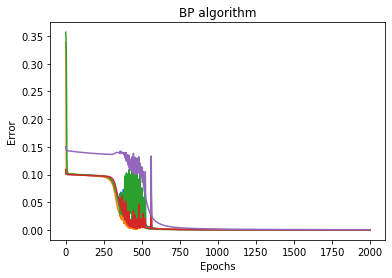

In [4]:
err_vector = []
alpha = 0.7
epochs = 2000

#def train_NeuralNetwork(epochs,network):
def train_NeuralNetwork(epochs,network,x_train,y_train):
    for epoch in range(epochs):

        count = 0
        err = 0

        #for x in X:
        for x in x_train:

            # Feed forward
            network[2] = feed_forward(x, network)

            # Network error
            err += net_error(y_train[count], network[2]['output_out'])

            # Back propagation
            network[0],network[1] = BP(x, y_train[count], network)

            count += 1
        print("Epoch {} error {}".format(epoch,err))    
        err_vector.append(err / X.shape[0])

train_NeuralNetwork(epochs,network,X,t)
#testing patterns
testing_patterns(network,X,t)

# Graph error
graph_error(err_vector)

# Decision boundaries
#dec_boundaries(X, t,  network)



# Entrenando Iris Dataset

In [5]:
from sklearn import datasets #importa la librería de datasets

dataset = datasets.load_iris()#importamos el dataset


In [64]:
print(dataset)
x_train = dataset.data[:,1::2] #extraemos los datos
original_targets = dataset.target #extraemos las etiquetas de los datos
#print(x_train)
#print(original_targets.shape)

def one_hot(labels):
    onehot_code = {0:[0,0,1],#For original label with code 0
                   1:[0,1,0],#For original label with code 1
                   2:[1,0,0]#For original label with code 2
                  }
    targets = []
    for label in labels: #for each label in the y_train array
        onehot_label = onehot_code[label]
        targets.append(onehot_label)
    
    return np.array(targets)
y_train = one_hot(original_targets)  

#print(x_train.shape)
#print(y_train.shape[1])
count = 0
for x in x_train:
    if count == 0:
        print('Class 1')
    elif count == 50:
        print('Class 2')
    elif count == 100:
        print('Class 3')
    count +=1
    print(x)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# Definimos nuestra arquitectura de red neuronal#

In [67]:
network_iris = Neural_network_model(x_train,y_train)
aux_network_iris = network_iris #to save the original initial value of the network

Número de capas ocultas: 5
Numero de neuronas en la capa 0 10
Numero de neuronas en la capa 1 10
Numero de neuronas en la capa 2 10
Numero de neuronas en la capa 3 10
Numero de neuronas en la capa 4 10


In [71]:
print(aux_network_iris)
print()
print()
print(network_iris)

[{'W_out': array([[-1.07358328e-02,  3.82960027e+00, -8.00799238e-01,
        -1.51227050e+00, -2.25571344e+00, -9.12056736e-01,
        -3.82357349e+00,  4.47730979e-01, -3.94087317e+00,
         1.87059649e+00],
       [ 1.75807493e+00, -3.42965723e+00, -1.73963367e+00,
         1.06340872e+00,  1.55314083e+00, -3.69694326e+00,
        -3.46945200e+00,  1.87738649e+00,  5.87807149e+00,
        -1.66692042e+00],
       [-3.92042439e+00, -2.69937195e+00, -1.83538579e+00,
        -2.08967919e+00, -3.02497640e+00,  5.68975027e+00,
         4.16400829e+00,  3.13507400e-03, -1.32291484e+00,
         5.04947641e-01]]), 'W_hl4': array([[-2.51749058,  1.87431376, -0.5019754 , -0.4986159 ,  0.9139128 ,
         0.09872342,  2.00841374, -1.81548483,  1.23521846,  1.0788822 ],
       [-5.31123082,  0.25707599, -0.84473212,  0.26730306, -1.68080797,
         0.85820432, -0.43415786,  2.40380181,  1.34593374,  2.1847643 ],
       [-0.80767017, -1.22996052, -0.58427006,  0.23214699, -0.05239737,
  

In [40]:
 network_iris = aux_network_iris

# Entrenamos la red #

In [68]:
#for tar in y_train:
#    print(tar)
alpha = 0.2
train_NeuralNetwork(4000,network_iris,x_train,y_train)
#testing patterns
testing_patterns(network_iris,x_train,y_train)

# Graph error
graph_error(err_vector)

Epoch 0 error [13.86122745 13.10068505  8.2169334 ]
Epoch 1 error [11.03572024 13.40508822 11.91922614]
Epoch 2 error [10.71398502 13.6611395  12.06118502]
Epoch 3 error [10.32956929 13.80444209 12.02409546]
Epoch 4 error [ 9.88279069 13.85711189 11.97807875]
Epoch 5 error [ 9.362665   13.77326238 11.93051067]
Epoch 6 error [ 8.77313118 13.48759419 11.89018068]
Epoch 7 error [ 8.14607056 12.93894116 11.87028689]
Epoch 8 error [ 7.53871742 12.1467224  11.88007779]
Epoch 9 error [ 6.99204472 11.28555552 11.90153813]
Epoch 10 error [ 6.46581345 10.59070254 11.86550655]
Epoch 11 error [ 5.87854915 10.16654827 11.69134044]
Epoch 12 error [ 5.21973832  9.96211202 11.37379029]
Epoch 13 error [ 4.54873236  9.86349067 10.99657826]
Epoch 14 error [ 3.93291947  9.74108963 10.68020512]
Epoch 15 error [ 3.40671181  9.46543471 10.52836165]
Epoch 16 error [ 2.98943695  8.99442315 10.58729869]
Epoch 17 error [ 2.74678064  8.44903687 10.80580819]
Epoch 18 error [ 2.70021419  7.93687865 11.061241  ]
Epo

Epoch 172 error [0.89406459 0.91743628 0.0265899 ]
Epoch 173 error [0.82369736 0.84594329 0.02644322]
Epoch 174 error [1.17467069 1.19659775 0.02746625]
Epoch 175 error [1.3876323  1.42091803 0.03118899]
Epoch 176 error [0.81777761 0.83292196 0.02319996]
Epoch 177 error [0.8169045  0.83747688 0.02327009]
Epoch 178 error [1.60820414 1.68523132 0.02766722]
Epoch 179 error [1.37121287 1.39292659 0.02567566]
Epoch 180 error [1.60538664 1.64097598 0.02798217]
Epoch 181 error [1.58466064 1.68376522 0.03135719]
Epoch 182 error [1.31180489 1.38400366 0.03287342]
Epoch 183 error [1.02799882 1.04680136 0.02524327]
Epoch 184 error [1.50209088 1.5410169  0.02950692]
Epoch 185 error [0.84081843 0.86157734 0.02444082]
Epoch 186 error [0.95311297 0.96160002 0.02537183]
Epoch 187 error [1.52194327 1.55713058 0.02665331]
Epoch 188 error [1.13890285 1.16900855 0.0240067 ]
Epoch 189 error [1.64721807 1.70726364 0.03247729]
Epoch 190 error [1.51125901 1.61223471 0.02337238]
Epoch 191 error [1.39573184 1.4

Epoch 336 error [1.66766263 1.67589917 0.00989608]
Epoch 337 error [1.43532301 1.43690539 0.00767327]
Epoch 338 error [3.84118155 3.8577742  0.00677219]
Epoch 339 error [2.19862792 2.21713995 0.0128121 ]
Epoch 340 error [1.66782657 1.74943632 0.00920876]
Epoch 341 error [1.65537909 1.71397515 0.00872744]
Epoch 342 error [1.5781103  1.61290986 0.00875977]
Epoch 343 error [2.36918696 2.39837275 0.00864604]
Epoch 344 error [1.62355435 1.68046103 0.00934074]
Epoch 345 error [1.51206612 1.52738504 0.00866108]
Epoch 346 error [1.37635917 1.36842225 0.00943266]
Epoch 347 error [1.70518543 1.69781374 0.00789078]
Epoch 348 error [1.40202865 1.40186319 0.00818082]
Epoch 349 error [2.13196349 2.16947354 0.01233631]
Epoch 350 error [1.51261321 1.53165352 0.00842809]
Epoch 351 error [2.4022907  2.41659414 0.01032367]
Epoch 352 error [1.49938488 1.5168674  0.0081582 ]
Epoch 353 error [3.86085205 3.92119763 0.00794453]
Epoch 354 error [2.35873612 2.40387968 0.01382031]
Epoch 355 error [1.47980656 1.4

Epoch 520 error [2.19051105 2.17450169 0.00722053]
Epoch 521 error [2.25871427 2.24393885 0.00749285]
Epoch 522 error [2.06410948 2.08902219 0.00763431]
Epoch 523 error [3.20004758 3.21524621 0.00640265]
Epoch 524 error [2.78791141 2.80081015 0.00838289]
Epoch 525 error [2.80669671 2.81828136 0.01182573]
Epoch 526 error [2.31415141 2.33550634 0.01033897]
Epoch 527 error [2.35688005 2.37230374 0.00997375]
Epoch 528 error [2.28134064 2.29721423 0.01035201]
Epoch 529 error [2.36515702 2.38250507 0.0096766 ]
Epoch 530 error [2.24409805 2.25517682 0.00985297]
Epoch 531 error [2.30014538 2.31276687 0.00946345]
Epoch 532 error [2.3647445  2.38444156 0.00910017]
Epoch 533 error [2.26195867 2.27072132 0.00903699]
Epoch 534 error [2.26784931 2.26259303 0.00845717]
Epoch 535 error [2.24227161 2.22338827 0.00839378]
Epoch 536 error [2.20836125 2.18740101 0.00819673]
Epoch 537 error [2.21467981 2.18828414 0.0077595 ]
Epoch 538 error [2.2202851  2.18818529 0.00745725]
Epoch 539 error [2.16434754 2.1

Epoch 700 error [2.20649825 2.17082539 0.00615703]
Epoch 701 error [2.172579   2.1391267  0.00617669]
Epoch 702 error [2.19427673 2.17970625 0.00652571]
Epoch 703 error [2.20608336 2.17489235 0.00716763]
Epoch 704 error [2.19323965 2.15634049 0.00653255]
Epoch 705 error [2.25357483 2.24807961 0.00651756]
Epoch 706 error [2.20887456 2.17834273 0.00601812]
Epoch 707 error [2.36555387 2.33509439 0.00641284]
Epoch 708 error [2.18221911 2.14246747 0.0058453 ]
Epoch 709 error [2.20402798 2.1661211  0.00575346]
Epoch 710 error [2.19074574 2.15358977 0.00565877]
Epoch 711 error [2.2129268  2.17533983 0.00568683]
Epoch 712 error [2.16042625 2.12368352 0.00558386]
Epoch 713 error [2.33645018 2.324707   0.00581878]
Epoch 714 error [2.09531527 2.07954655 0.00555016]
Epoch 715 error [2.19991641 2.18221104 0.0053562 ]
Epoch 716 error [2.41156757 2.4445501  0.00723314]
Epoch 717 error [2.21855956 2.23892908 0.00601651]
Epoch 718 error [2.42492693 2.40928971 0.00645297]
Epoch 719 error [2.3566636  2.3

Epoch 864 error [4.16609569e+00 4.20193432e+00 3.62556007e-03]
Epoch 865 error [3.45128172 3.5006789  0.00468123]
Epoch 866 error [1.34447816 1.33672105 0.00430073]
Epoch 867 error [2.39822814 2.3645171  0.00325407]
Epoch 868 error [2.31375062 2.27889471 0.00334658]
Epoch 869 error [2.27571773 2.21122027 0.0034433 ]
Epoch 870 error [2.19984201 2.15573741 0.00328032]
Epoch 871 error [2.83455663 2.88171147 0.00586225]
Epoch 872 error [3.65099437 3.58699374 0.00531153]
Epoch 873 error [1.70080893 1.64580347 0.00416716]
Epoch 874 error [2.1670439  2.11753047 0.00336999]
Epoch 875 error [2.14599081 2.15883155 0.0031695 ]
Epoch 876 error [2.24548775 2.21852838 0.0030761 ]
Epoch 877 error [2.65377915 2.66358847 0.00323092]
Epoch 878 error [2.34264217 2.34154024 0.00302544]
Epoch 879 error [2.25911993 2.23652824 0.0030492 ]
Epoch 880 error [4.44221342e+00 4.46004555e+00 4.40077353e-03]
Epoch 881 error [1.73503075 1.69144824 0.00413559]
Epoch 882 error [2.28544229 2.27306191 0.00364215]
Epoch 8

Epoch 1019 error [2.28380483 2.22232013 0.00260098]
Epoch 1020 error [2.32360555 2.30063085 0.00257798]
Epoch 1021 error [2.35735202 2.2817636  0.00286376]
Epoch 1022 error [2.17340841 2.14468131 0.00287502]
Epoch 1023 error [2.1562573  2.13725245 0.00265087]
Epoch 1024 error [3.08816614 3.07762804 0.00346398]
Epoch 1025 error [2.17320554 2.15159521 0.00269327]
Epoch 1026 error [2.41700753 2.39230662 0.00296482]
Epoch 1027 error [2.22716407 2.20863795 0.00255148]
Epoch 1028 error [2.2426824  2.20746077 0.00255359]
Epoch 1029 error [4.30517788e+00 4.21509385e+00 3.44279080e-03]
Epoch 1030 error [2.52965815 2.55548354 0.00281078]
Epoch 1031 error [2.80608485 2.75360006 0.0028832 ]
Epoch 1032 error [2.23072065 2.22506621 0.00238805]
Epoch 1033 error [2.78434771e+00 2.81349014e+00 2.49287503e-03]
Epoch 1034 error [2.09257737 2.0712198  0.0023765 ]
Epoch 1035 error [2.58071115 2.54486042 0.00285022]
Epoch 1036 error [2.4737093  2.46644812 0.00278534]
Epoch 1037 error [3.91643795e+00 3.88402

Epoch 1164 error [2.21651226 2.15212037 0.0025236 ]
Epoch 1165 error [3.33190089e+00 3.38542886e+00 2.19446749e-03]
Epoch 1166 error [2.30485904 2.29439747 0.00234509]
Epoch 1167 error [2.29899468 2.27044803 0.00234121]
Epoch 1168 error [3.67690762e+00 3.52266907e+00 2.45924261e-03]
Epoch 1169 error [3.54345738e+00 3.42537369e+00 2.39372094e-03]
Epoch 1170 error [2.35883024 2.40910762 0.00267929]
Epoch 1171 error [3.09565057e+00 3.02850962e+00 2.54734691e-03]
Epoch 1172 error [3.57673607e+00 3.63309112e+00 2.22366189e-03]
Epoch 1173 error [3.35510630e+00 3.39226787e+00 2.28409530e-03]
Epoch 1174 error [2.39374855e+00 2.42988797e+00 2.24606603e-03]
Epoch 1175 error [2.16742312e+00 2.19398521e+00 2.04883452e-03]
Epoch 1176 error [2.34325415e+00 2.29676164e+00 2.08120063e-03]
Epoch 1177 error [3.48858994e+00 3.53471197e+00 1.63684871e-03]
Epoch 1178 error [2.01487642e+00 2.00282324e+00 1.99762663e-03]
Epoch 1179 error [2.18034631 2.19694985 0.00248521]
Epoch 1180 error [2.20391711 2.21456

Epoch 1308 error [2.16398851 2.1271324  0.00230222]
Epoch 1309 error [2.33683233 2.21117098 0.0024436 ]
Epoch 1310 error [2.28224434e+00 2.25559375e+00 2.12117897e-03]
Epoch 1311 error [2.36094168e+00 2.24501327e+00 2.35672084e-03]
Epoch 1312 error [2.12915373e+00 2.10419493e+00 1.96930413e-03]
Epoch 1313 error [1.86362127 1.88982974 0.00202658]
Epoch 1314 error [3.07836211e+00 3.13603502e+00 2.17305840e-03]
Epoch 1315 error [2.11051599 1.99744909 0.00324845]
Epoch 1316 error [2.17305869 2.04016141 0.00254214]
Epoch 1317 error [2.12780894 2.08978741 0.00226359]
Epoch 1318 error [2.00038668e+00 1.99683102e+00 1.99853859e-03]
Epoch 1319 error [2.21018344 2.11281864 0.00246234]
Epoch 1320 error [2.31038715e+00 2.29845223e+00 1.93154026e-03]
Epoch 1321 error [2.20377393e+00 2.09990963e+00 2.11307747e-03]
Epoch 1322 error [2.08820357e+00 2.03110333e+00 1.80037785e-03]
Epoch 1323 error [2.29939968e+00 2.31854121e+00 2.08986225e-03]
Epoch 1324 error [2.37583333e+00 2.36828619e+00 2.11025292e-

Epoch 1450 error [6.16504348e+00 6.13558541e+00 1.19422173e-03]
Epoch 1451 error [3.54334999e+00 3.56138743e+00 1.06039933e-03]
Epoch 1452 error [3.48872905e+00 3.49648227e+00 9.23735504e-04]
Epoch 1453 error [2.78200136e+00 2.79313242e+00 9.37242593e-04]
Epoch 1454 error [2.31994223e+00 2.30822887e+00 7.99536257e-04]
Epoch 1455 error [2.50308563e+00 2.52586430e+00 7.33504432e-04]
Epoch 1456 error [2.23632188e+00 2.20279687e+00 8.17744577e-04]
Epoch 1457 error [2.28152700e+00 2.20749301e+00 1.26203650e-03]
Epoch 1458 error [2.49032469 2.40123735 0.00433924]
Epoch 1459 error [3.48303573e+00 3.59399199e+00 1.28162494e-03]
Epoch 1460 error [3.36046809e+00 3.27465576e+00 9.97862609e-04]
Epoch 1461 error [3.00639009e+00 3.00063567e+00 1.27826890e-03]
Epoch 1462 error [2.23851206e+00 2.25442562e+00 1.51932024e-03]
Epoch 1463 error [2.35886218e+00 2.38805083e+00 1.29760770e-03]
Epoch 1464 error [2.80513935e+00 2.77776155e+00 1.01198651e-03]
Epoch 1465 error [3.02278996e+00 2.98922254e+00 1.09

Epoch 1594 error [2.27048087 2.30242478 0.00297499]
Epoch 1595 error [2.36750556e+00 2.39445016e+00 1.41302383e-03]
Epoch 1596 error [2.14391772e+00 2.14792840e+00 1.19117456e-03]
Epoch 1597 error [2.52233774e+00 2.54430104e+00 9.01769249e-04]
Epoch 1598 error [2.33439509e+00 2.32078683e+00 8.74978082e-04]
Epoch 1599 error [2.13428290e+00 2.08290306e+00 7.97110982e-04]
Epoch 1600 error [2.20702811e+00 2.12578741e+00 1.78617935e-03]
Epoch 1601 error [2.14762461 2.14721998 0.00988927]
Epoch 1602 error [2.15072758e+00 2.10536273e+00 2.09040282e-03]
Epoch 1603 error [4.19139547e+00 4.39897340e+00 1.72818451e-03]
Epoch 1604 error [2.39477431 2.38107019 0.00263284]
Epoch 1605 error [2.3180978  2.31788799 0.00479583]
Epoch 1606 error [2.2054401  2.21285754 0.00328415]
Epoch 1607 error [2.28872425e+00 2.29661046e+00 2.24215355e-03]
Epoch 1608 error [2.50253656e+00 2.51467778e+00 1.88980876e-03]
Epoch 1609 error [2.13498322 2.14666671 0.00238353]
Epoch 1610 error [2.11109149e+00 2.09596480e+00 

Epoch 1736 error [2.11671646 2.14642026 0.00256356]
Epoch 1737 error [1.89594851 1.84949024 0.00216401]
Epoch 1738 error [2.45758967 2.53188261 0.00284615]
Epoch 1739 error [2.0148447  1.94843841 0.00247099]
Epoch 1740 error [2.02427498 1.96434438 0.00236997]
Epoch 1741 error [2.0117293  1.95190537 0.00227233]
Epoch 1742 error [1.99396385 1.93361654 0.00219756]
Epoch 1743 error [1.97722107 1.91662876 0.00214763]
Epoch 1744 error [1.96208636 1.90154885 0.00211857]
Epoch 1745 error [1.94826596 1.88800737 0.00210575]
Epoch 1746 error [1.93551951 1.87570856 0.00210481]
Epoch 1747 error [1.92370256 1.86447285 0.00211188]
Epoch 1748 error [1.91271452 1.85417554 0.00212381]
Epoch 1749 error [1.90246954 1.8447123  0.00213837]
Epoch 1750 error [1.89288716 1.83598728 0.00215416]
Epoch 1751 error [1.88389194 1.82791141 0.00217038]
Epoch 1752 error [1.87541587 1.82040401 0.00218658]
Epoch 1753 error [1.86740072 1.81339489 0.00220244]
Epoch 1754 error [1.85979948 1.80682577 0.00221772]
Epoch 1755 e

Epoch 1919 error [2.48037225 2.41726759 0.00405429]
Epoch 1920 error [2.22204276 2.15401903 0.01286085]
Epoch 1921 error [1.97753019 1.99640293 0.0033058 ]
Epoch 1922 error [1.79625267 1.76370274 0.00347399]
Epoch 1923 error [1.88911394 1.84396796 0.00283966]
Epoch 1924 error [1.95707466 1.90955517 0.00264493]
Epoch 1925 error [1.7534869  1.7971626  0.00254922]
Epoch 1926 error [1.67341901 1.7284096  0.00326183]
Epoch 1927 error [1.81897483 1.80423515 0.00350233]
Epoch 1928 error [1.7010457  1.73132118 0.00287346]
Epoch 1929 error [2.02327726 2.06634603 0.00347954]
Epoch 1930 error [2.01191809 2.03521431 0.00355521]
Epoch 1931 error [1.77341667 1.73794857 0.00361527]
Epoch 1932 error [1.73267784 1.68862159 0.00302963]
Epoch 1933 error [1.70796581 1.66608614 0.0027756 ]
Epoch 1934 error [1.84818303 1.85554664 0.00281743]
Epoch 1935 error [1.51607982 1.60460382 0.00280255]
Epoch 1936 error [2.05191841 2.06443667 0.00578274]
Epoch 1937 error [1.8588921  1.8258328  0.00378925]
Epoch 1938 e

Epoch 2061 error [2.30739575e+00 2.31357198e+00 1.12427705e-03]
Epoch 2062 error [2.26747576e+00 2.27167384e+00 9.34462368e-04]
Epoch 2063 error [2.28497861e+00 2.29636608e+00 1.03446698e-03]
Epoch 2064 error [3.56568182e+00 3.56731931e+00 8.82926902e-04]
Epoch 2065 error [3.47162369e+00 3.47289967e+00 1.02068420e-03]
Epoch 2066 error [2.65634671e+00 2.65276067e+00 1.07714827e-03]
Epoch 2067 error [3.10199608e+00 3.09319593e+00 1.25259957e-03]
Epoch 2068 error [3.41177923e+00 3.38615480e+00 1.72059206e-03]
Epoch 2069 error [3.43900253e+00 3.44520714e+00 1.01916490e-03]
Epoch 2070 error [2.54641888e+00 2.55552800e+00 1.01023244e-03]
Epoch 2071 error [2.57361031e+00 2.55958178e+00 1.12134484e-03]
Epoch 2072 error [2.31800485e+00 2.32347440e+00 9.70805123e-04]
Epoch 2073 error [2.59530521e+00 2.58335758e+00 7.97619786e-04]
Epoch 2074 error [2.53585044e+00 2.51719315e+00 9.70455215e-04]
Epoch 2075 error [2.74730980e+00 2.72549150e+00 8.85768349e-04]
Epoch 2076 error [2.22737557e+00 2.20619

Epoch 2195 error [1.87745523 1.84626992 0.00262227]
Epoch 2196 error [1.80923493 1.79824844 0.00234634]
Epoch 2197 error [1.89508737 1.93579534 0.0024335 ]
Epoch 2198 error [4.29376617e+00 4.26924475e+00 1.50151431e-03]
Epoch 2199 error [3.21546060e+00 3.19757158e+00 1.26623649e-03]
Epoch 2200 error [2.37542188e+00 2.37935866e+00 1.85250611e-03]
Epoch 2201 error [2.32414142e+00 2.32994550e+00 1.84274962e-03]
Epoch 2202 error [2.44856729e+00 2.45919343e+00 1.58741301e-03]
Epoch 2203 error [2.43884205e+00 2.44020361e+00 1.31210550e-03]
Epoch 2204 error [2.43135338e+00 2.43267249e+00 1.05571278e-03]
Epoch 2205 error [2.36718886e+00 2.37537341e+00 9.45903675e-04]
Epoch 2206 error [2.48904448e+00 2.49562400e+00 1.44993141e-03]
Epoch 2207 error [2.26049186e+00 2.25946728e+00 1.36839828e-03]
Epoch 2208 error [2.42260129e+00 2.42003824e+00 9.91023444e-04]
Epoch 2209 error [2.31190804e+00 2.31671945e+00 8.86013855e-04]
Epoch 2210 error [2.45487282e+00 2.46416726e+00 9.59989390e-04]
Epoch 2211 e

Epoch 2351 error [2.45016103e+00 2.45712100e+00 4.63157519e-04]
Epoch 2352 error [2.43724979e+00 2.44359473e+00 4.60270334e-04]
Epoch 2353 error [2.42663364e+00 2.43273308e+00 4.64702923e-04]
Epoch 2354 error [2.41285304e+00 2.41924285e+00 4.74358089e-04]
Epoch 2355 error [2.39663156e+00 2.40372332e+00 4.83686617e-04]
Epoch 2356 error [2.40507566e+00 2.41505575e+00 5.00414309e-04]
Epoch 2357 error [2.37723788e+00 2.38592202e+00 5.13296748e-04]
Epoch 2358 error [2.36195870e+00 2.36948163e+00 5.70020357e-04]
Epoch 2359 error [2.33980243e+00 2.34627411e+00 7.82609432e-04]
Epoch 2360 error [2.32235661e+00 2.33122854e+00 1.49040878e-03]
Epoch 2361 error [2.38485293e+00 2.39749836e+00 1.41835672e-03]
Epoch 2362 error [2.40329332e+00 2.41556842e+00 1.44231865e-03]
Epoch 2363 error [2.32188661e+00 2.33622888e+00 1.92559607e-03]
Epoch 2364 error [2.36878758e+00 2.37595821e+00 9.58321407e-04]
Epoch 2365 error [2.29574100e+00 2.30494754e+00 1.60802720e-03]
Epoch 2366 error [2.33507495e+00 2.33870

Epoch 2485 error [2.15006124e+00 2.14274253e+00 1.75912411e-03]
Epoch 2486 error [2.16699106e+00 2.16219571e+00 1.95316323e-03]
Epoch 2487 error [2.10932351 2.11267498 0.00218635]
Epoch 2488 error [2.47722122 2.54419823 0.00549675]
Epoch 2489 error [4.72505719e+00 4.67518166e+00 3.41509056e-03]
Epoch 2490 error [2.92879316e+00 2.94048861e+00 1.93829844e-03]
Epoch 2491 error [2.32144307e+00 2.32442265e+00 9.75509878e-04]
Epoch 2492 error [2.26861684e+00 2.26965937e+00 7.33836535e-04]
Epoch 2493 error [2.30285942e+00 2.29229474e+00 7.43069319e-04]
Epoch 2494 error [2.36159145e+00 2.36734337e+00 5.95622589e-04]
Epoch 2495 error [2.24606469e+00 2.23513317e+00 6.24487643e-04]
Epoch 2496 error [2.29940242e+00 2.29664165e+00 7.27617790e-04]
Epoch 2497 error [2.51284007e+00 2.50371949e+00 7.53184307e-04]
Epoch 2498 error [2.15782357e+00 2.15167101e+00 6.95059711e-04]
Epoch 2499 error [2.22331066e+00 2.23005266e+00 6.68067636e-04]
Epoch 2500 error [2.47042434e+00 2.47172362e+00 7.19698595e-04]


Epoch 2623 error [2.96462155e+00 2.93325880e+00 1.42654590e-03]
Epoch 2624 error [2.45205566e+00 2.44614363e+00 1.15038396e-03]
Epoch 2625 error [2.28995453e+00 2.28317361e+00 1.27268803e-03]
Epoch 2626 error [2.22481610e+00 2.22110333e+00 1.87295462e-03]
Epoch 2627 error [2.29220018e+00 2.28770218e+00 1.37665967e-03]
Epoch 2628 error [2.17822538e+00 2.16828429e+00 1.38698912e-03]
Epoch 2629 error [2.13320214e+00 2.12810905e+00 9.40927921e-04]
Epoch 2630 error [2.03326517e+00 2.03626637e+00 9.86819416e-04]
Epoch 2631 error [1.97965832e+00 1.96577253e+00 1.77678117e-03]
Epoch 2632 error [3.14016164e+00 3.12800699e+00 1.58182493e-03]
Epoch 2633 error [2.30424493e+00 2.29586121e+00 9.58791087e-04]
Epoch 2634 error [2.14113955e+00 2.13324304e+00 1.13847441e-03]
Epoch 2635 error [2.21399207e+00 2.20871440e+00 1.02216400e-03]
Epoch 2636 error [2.05100813e+00 2.04783888e+00 9.17027951e-04]
Epoch 2637 error [1.91064540e+00 1.90908670e+00 1.18430065e-03]
Epoch 2638 error [2.16806639 2.18398149 

Epoch 2763 error [1.5279978  1.52704354 0.00217287]
Epoch 2764 error [1.52587643 1.5252269  0.0021758 ]
Epoch 2765 error [1.52383555 1.52347424 0.00217837]
Epoch 2766 error [1.52188268 1.52179512 0.00218063]
Epoch 2767 error [1.51998794 1.52015887 0.00218251]
Epoch 2768 error [1.51819425 1.51861356 0.00218419]
Epoch 2769 error [1.51640054 1.51705064 0.00218537]
Epoch 2770 error [1.51480163 1.51568499 0.00218681]
Epoch 2771 error [1.5129709  1.51404796 0.00218691]
Epoch 2772 error [1.51183181 1.51316385 0.00218953]
Epoch 2773 error [1.50933817 1.5107509  0.00218559]
Epoch 2774 error [1.51035126 1.5122525  0.00219753]
Epoch 2775 error [1.50481113 1.50620494 0.00217082]
Epoch 2776 error [1.51953753 1.5231625  0.00224899]
Epoch 2777 error [1.51283635 1.51422668 0.00212168]
Epoch 2778 error [1.71945196 1.72090507 0.00249822]
Epoch 2779 error [1.51424454 1.51091565 0.00183804]
Epoch 2780 error [1.58843374 1.59513988 0.00308322]
Epoch 2781 error [1.68507247 1.67529592 0.00175093]
Epoch 2782 e

Epoch 2909 error [2.46450158e+00 2.46332419e+00 1.31118752e-03]
Epoch 2910 error [2.42298448e+00 2.41710310e+00 1.03664119e-03]
Epoch 2911 error [2.29564722e+00 2.28425007e+00 9.70719392e-04]
Epoch 2912 error [2.26148331e+00 2.24583145e+00 9.01046533e-04]
Epoch 2913 error [2.41668360e+00 2.42090354e+00 9.63694739e-04]
Epoch 2914 error [2.28134062e+00 2.27535417e+00 9.36019837e-04]
Epoch 2915 error [2.22129693e+00 2.21281074e+00 9.13330903e-04]
Epoch 2916 error [2.31309481e+00 2.31014426e+00 9.70171616e-04]
Epoch 2917 error [2.40358135e+00 2.39787530e+00 9.97984341e-04]
Epoch 2918 error [2.16460756e+00 2.14374492e+00 9.43827730e-04]
Epoch 2919 error [2.20096817e+00 2.18523880e+00 1.01933871e-03]
Epoch 2920 error [2.22389970e+00 2.21393657e+00 1.06123082e-03]
Epoch 2921 error [2.21512443e+00 2.20541208e+00 1.07527983e-03]
Epoch 2922 error [2.18096587e+00 2.16807260e+00 1.07699337e-03]
Epoch 2923 error [2.13280801e+00 2.11902947e+00 1.10879411e-03]
Epoch 2924 error [2.08649185e+00 2.07758

Epoch 3055 error [1.95486941e+00 1.92992639e+00 1.88065580e-03]
Epoch 3056 error [1.95918827 1.93778318 0.00283331]
Epoch 3057 error [3.05815042e+00 3.04263612e+00 2.40280057e-03]
Epoch 3058 error [1.62703182 1.62924394 0.00240408]
Epoch 3059 error [1.80464005 1.7882963  0.00317193]
Epoch 3060 error [2.44468267 2.40920816 0.0024768 ]
Epoch 3061 error [1.71690606 1.71111493 0.00292692]
Epoch 3062 error [1.68115584 1.67376097 0.00244215]
Epoch 3063 error [1.65103445 1.6434758  0.00226422]
Epoch 3064 error [1.6228298  1.61506261 0.00217304]
Epoch 3065 error [1.59732971 1.5892953  0.0021519 ]
Epoch 3066 error [1.5765142  1.56835311 0.00218162]
Epoch 3067 error [1.56029897 1.55216322 0.00224926]
Epoch 3068 error [1.54777685 1.5397572  0.00234157]
Epoch 3069 error [1.53843919 1.53063118 0.00244501]
Epoch 3070 error [1.53175365 1.52426724 0.0025475 ]
Epoch 3071 error [1.52709489 1.52003672 0.00263927]
Epoch 3072 error [1.52379435 1.5172467  0.00271366]
Epoch 3073 error [1.52124384 1.51525164 

Epoch 3237 error [2.19535822e+00 2.16865029e+00 9.42504837e-04]
Epoch 3238 error [2.31394388e+00 2.31321237e+00 9.91971729e-04]
Epoch 3239 error [2.33486796e+00 2.32209339e+00 1.23448421e-03]
Epoch 3240 error [2.35253678e+00 2.34171277e+00 1.27037665e-03]
Epoch 3241 error [2.18657673e+00 2.17060895e+00 1.09053959e-03]
Epoch 3242 error [2.35904095e+00 2.35047566e+00 1.25551277e-03]
Epoch 3243 error [2.20785039e+00 2.18654396e+00 1.17158928e-03]
Epoch 3244 error [2.24274427e+00 2.22891782e+00 1.24542512e-03]
Epoch 3245 error [2.24766354e+00 2.23413971e+00 1.26072814e-03]
Epoch 3246 error [2.23840775e+00 2.22239030e+00 1.25964624e-03]
Epoch 3247 error [2.21946325e+00 2.20054733e+00 1.25350167e-03]
Epoch 3248 error [2.20281090e+00 2.18266117e+00 1.25904164e-03]
Epoch 3249 error [2.19457100e+00 2.17449386e+00 1.27029444e-03]
Epoch 3250 error [2.19091836e+00 2.17122625e+00 1.27527299e-03]
Epoch 3251 error [2.18880819e+00 2.16961782e+00 1.27273002e-03]
Epoch 3252 error [2.18629629e+00 2.16763

Epoch 3386 error [2.50455702e+00 2.52156567e+00 2.01734700e-03]
Epoch 3387 error [2.23967599e+00 2.26360008e+00 2.13640201e-03]
Epoch 3388 error [2.23154430e+00 2.25486312e+00 2.14423871e-03]
Epoch 3389 error [2.22015192e+00 2.24273273e+00 2.14297830e-03]
Epoch 3390 error [2.21595582e+00 2.23680017e+00 2.15961108e-03]
Epoch 3391 error [2.21293281e+00 2.23241536e+00 2.16927076e-03]
Epoch 3392 error [2.21017630e+00 2.22866342e+00 2.17111674e-03]
Epoch 3393 error [2.20779974e+00 2.22548841e+00 2.16929582e-03]
Epoch 3394 error [2.20567898e+00 2.22268436e+00 2.16564283e-03]
Epoch 3395 error [2.20390907e+00 2.22029534e+00 2.16151226e-03]
Epoch 3396 error [2.20237188e+00 2.21820434e+00 2.15697252e-03]
Epoch 3397 error [2.20101228e+00 2.21634664e+00 2.15229591e-03]
Epoch 3398 error [2.19981477e+00 2.21469714e+00 2.14773039e-03]
Epoch 3399 error [2.19872888e+00 2.21320065e+00 2.14335659e-03]
Epoch 3400 error [2.19776974e+00 2.21186535e+00 2.13932015e-03]
Epoch 3401 error [2.19685195e+00 2.21060

Epoch 3543 error [2.39948347 2.36215563 0.00306237]
Epoch 3544 error [2.43483934 2.41802165 0.00551742]
Epoch 3545 error [2.23273135 2.21520642 0.00258867]
Epoch 3546 error [3.21198993 3.20389339 0.00353252]
Epoch 3547 error [2.64884736e+00 2.58143633e+00 2.52977582e-03]
Epoch 3548 error [2.1178231  2.28319702 0.16592417]
Epoch 3549 error [2.42021585 2.69826378 0.266781  ]
Epoch 3550 error [2.48418170e+00 2.50279706e+00 1.86317093e-03]
Epoch 3551 error [3.58219204 3.66644057 0.0041714 ]
Epoch 3552 error [2.16642686 2.14281842 0.00893928]
Epoch 3553 error [2.04291205 1.96041449 0.00888931]
Epoch 3554 error [2.03951262 1.95368537 0.00790312]
Epoch 3555 error [2.00288215 1.94521123 0.00697757]
Epoch 3556 error [2.00124361 1.94400664 0.00586726]
Epoch 3557 error [2.00093738 1.94384557 0.00527886]
Epoch 3558 error [2.00114868 1.94363003 0.00490814]
Epoch 3559 error [2.00173041 1.94321143 0.004659  ]
Epoch 3560 error [2.00244106 1.94250453 0.00448927]
Epoch 3561 error [2.00315153 1.94148097 

Epoch 3707 error [2.78739576e+00 2.78145360e+00 1.25928338e-03]
Epoch 3708 error [2.27494544 2.27889864 0.00307957]
Epoch 3709 error [2.12691720e+00 2.12713863e+00 1.90428635e-03]
Epoch 3710 error [2.17629790e+00 2.18663666e+00 1.71631842e-03]
Epoch 3711 error [2.81962174e+00 2.80876341e+00 1.57322436e-03]
Epoch 3712 error [2.33723756e+00 2.31417258e+00 1.80169569e-03]
Epoch 3713 error [2.12117763e+00 2.11981426e+00 1.64658095e-03]
Epoch 3714 error [2.41222812e+00 2.40121160e+00 1.57158927e-03]
Epoch 3715 error [2.22002181e+00 2.19397670e+00 1.66924821e-03]
Epoch 3716 error [2.34611882e+00 2.33026901e+00 1.83802899e-03]
Epoch 3717 error [2.33362534e+00 2.31451305e+00 1.54851882e-03]
Epoch 3718 error [2.51817730e+00 2.51971592e+00 1.76510483e-03]
Epoch 3719 error [2.07867770e+00 2.07347089e+00 1.69051035e-03]
Epoch 3720 error [2.32571612e+00 2.30665769e+00 1.74097669e-03]
Epoch 3721 error [2.18133568e+00 2.18723147e+00 1.64372846e-03]
Epoch 3722 error [2.12898371e+00 2.13122129e+00 1.65

Epoch 3843 error [2.31460286 2.3581568  0.00245649]
Epoch 3844 error [2.32580303e+00 2.36208386e+00 2.01763325e-03]
Epoch 3845 error [2.18415460e+00 2.20408549e+00 2.08601086e-03]
Epoch 3846 error [3.53453878e+00 3.52565523e+00 1.91123393e-03]
Epoch 3847 error [2.24706647e+00 2.24910400e+00 2.23921699e-03]
Epoch 3848 error [3.59879036e+00 3.57429577e+00 2.36793924e-03]
Epoch 3849 error [3.55382547e+00 3.53521836e+00 2.31257999e-03]
Epoch 3850 error [3.51451424e+00 3.49906983e+00 2.21478076e-03]
Epoch 3851 error [3.49339719e+00 3.48077345e+00 2.11337534e-03]
Epoch 3852 error [3.46450555e+00 3.45473097e+00 1.97468646e-03]
Epoch 3853 error [3.44343534e+00 3.43378629e+00 1.93632931e-03]
Epoch 3854 error [3.38755047e+00 3.38591630e+00 1.71237646e-03]
Epoch 3855 error [2.89511480e+00 2.73318771e+00 2.83518391e-03]
Epoch 3856 error [3.41360706e+00 3.41135357e+00 2.24851580e-03]
Epoch 3857 error [2.52852124 2.57630039 0.0027775 ]
Epoch 3858 error [2.7384645  2.5407238  0.00459147]
Epoch 3859 e

120. [3.2 2.3] ---- [1 0 0] ----> [9.13657252e-01 8.29049989e-02 8.62228049e-04]
121. [2.8 2. ] ---- [1 0 0] ----> [9.13619979e-01 8.29158562e-02 8.62517942e-04]
122. [2.8 2. ] ---- [1 0 0] ----> [9.13619979e-01 8.29158562e-02 8.62517942e-04]
123. [2.7 1.8] ---- [1 0 0] ----> [9.13532565e-01 8.29331585e-02 8.63307678e-04]
124. [3.3 2.1] ---- [1 0 0] ----> [9.13565447e-01 8.29180395e-02 8.63258478e-04]
125. [3.2 1.8] ---- [1 0 0] ----> [9.13268769e-01 8.29845879e-02 8.66755211e-04]
126. [2.8 1.8] ---- [1 0 0] ----> [9.13506285e-01 8.29359125e-02 8.63601391e-04]
127. [3.  1.8] ---- [1 0 0] ----> [9.13427068e-01 8.29478296e-02 8.64584749e-04]
128. [2.8 2.1] ---- [1 0 0] ----> [9.13649709e-01 8.29103295e-02 8.62249068e-04]
129. [3.  1.6] ---- [1 0 0] ----> [9.12380900e-01 8.38654087e-02 8.78636196e-04]
130. [2.8 1.9] ---- [1 0 0] ----> [9.13575276e-01 8.29235095e-02 8.62933450e-04]
131. [3.8 2. ] ---- [1 0 0] ----> [9.12486936e-01 8.30757658e-02 8.78695573e-04]
132. [2.8 2.2] ---- [1 0 0] 